Setting up the environment:
- import all necessary libraries,
- choose and open the desired image

In [1]:
# https://docs.knime.com/latest/pure_python_node_extensions_guide/index.html#introduction

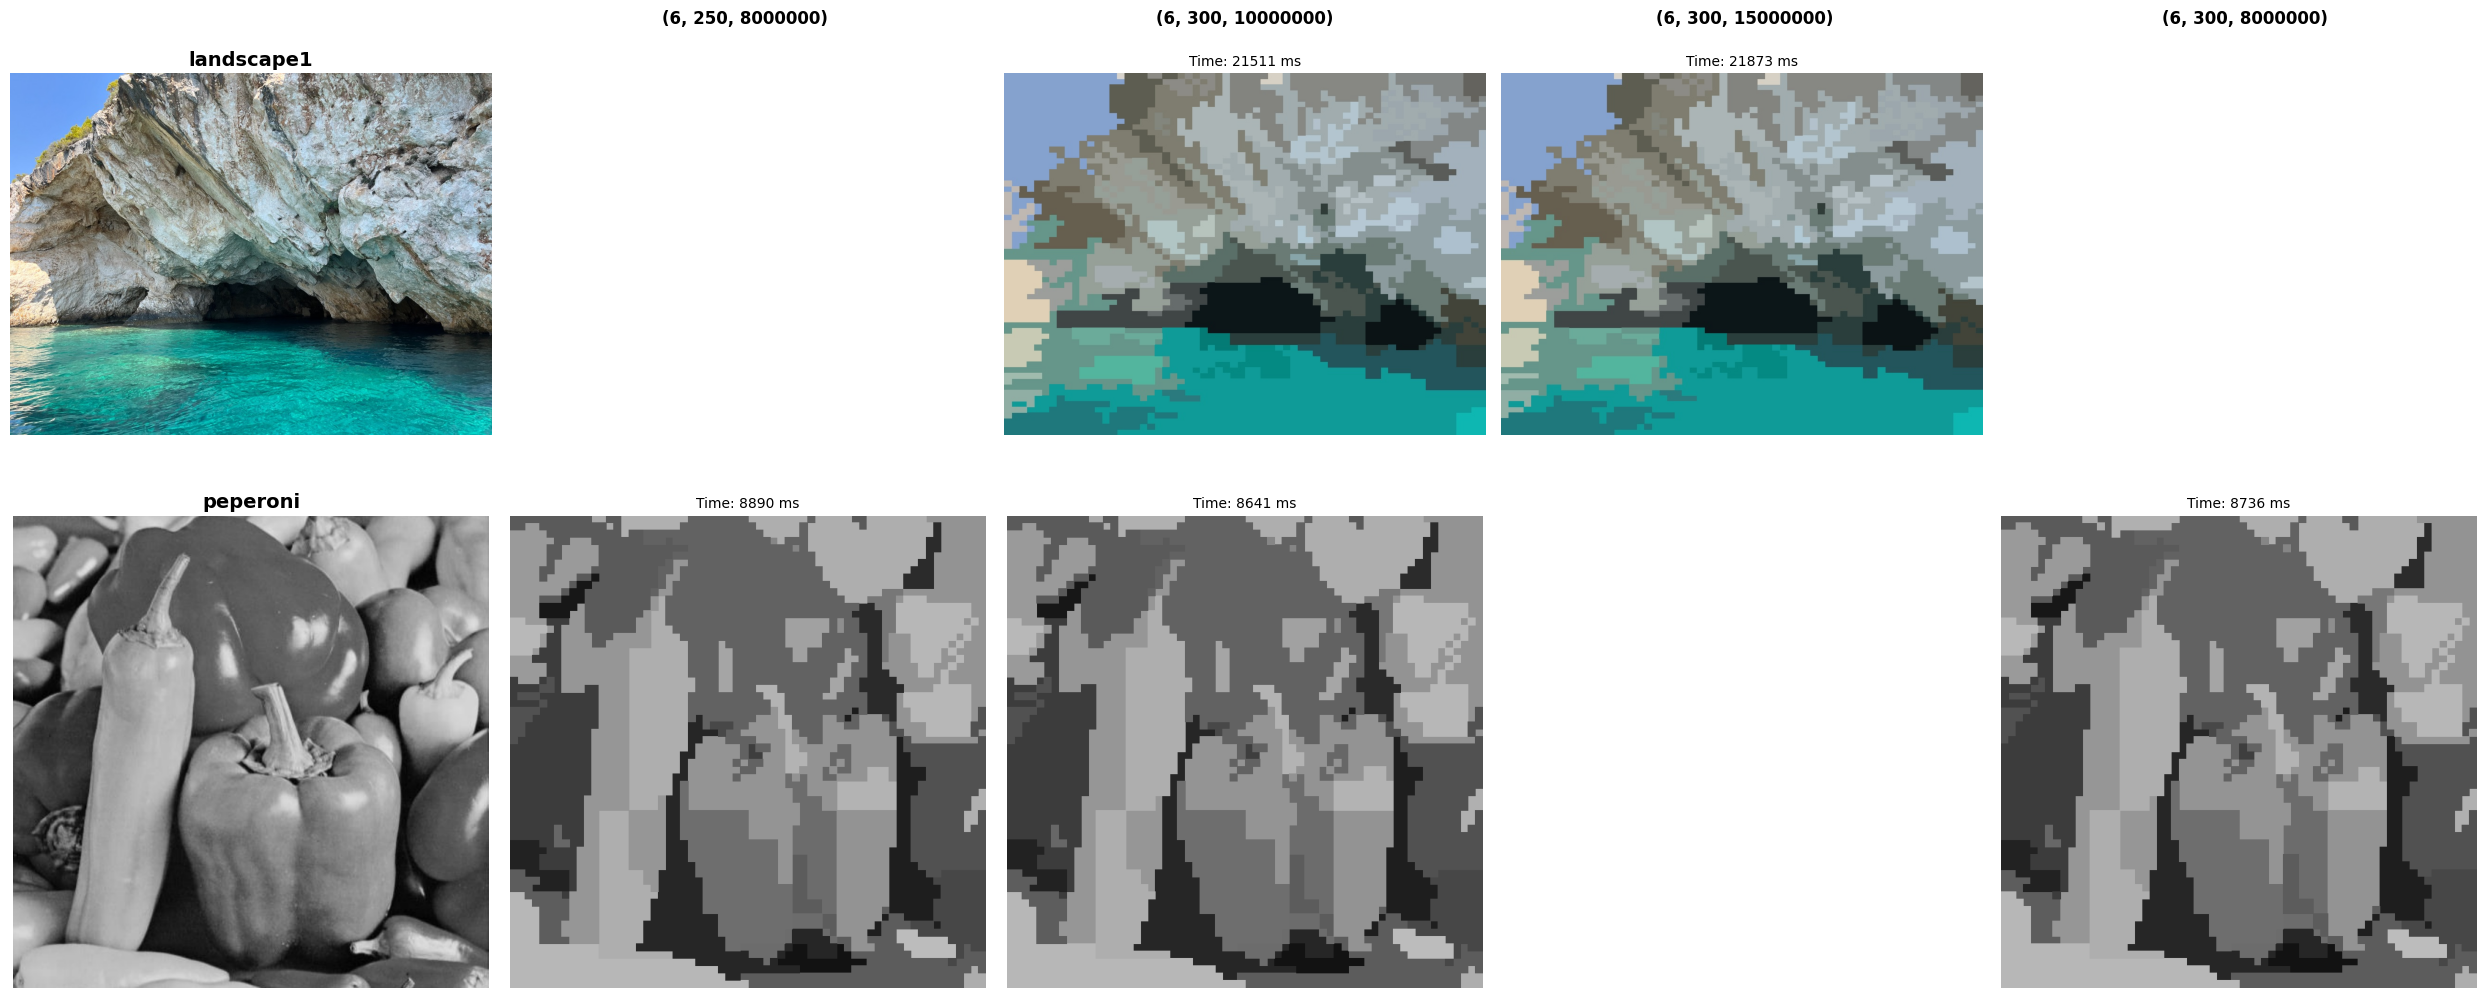

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time

from utils.split_and_merge import Region, split, merge, split_and_merge

from utils.lib import visualize_homogeneous_regions
from utils.lib import visualize_homogeneous_regions_with_avg_color
from utils.lib import visualize_regions_with_avg_color
from utils.lib import visualize_regions_with_borders
from utils.lib import save_image
from utils.lib import plot_previous_runs

# image_path = "images/landscape1.jpeg"
image_path = "images/landscape2.jpeg"
# image_path = "images/landscape3.jpeg"
# image_path = "images/birre.jpeg"
# image_path = "images/locandina.jpeg"
# image_path = "images/iphone.jpeg"
# image_path = "images/laurea.jpeg"
# image_path = "images/ruffo.jpeg"
# image_path = "images/gigi.jpeg"
# image_path = "images/moto.jpeg"
# image_path = "images/freccette.png"
# image_path = "images/peperoni.png"

input_image = cv2.imread(image_path)

plot_previous_runs()

Settings parameters:

In [3]:
split_threshold = 300
split_depth = 6
merge_threshold = 15000000

Running the complete split and merge algorithm 

Removed slower run: landscape1_6_300_15000000_21873.jpeg
Saved: previous_runs/landscape1_6_300_15000000_21807.jpeg


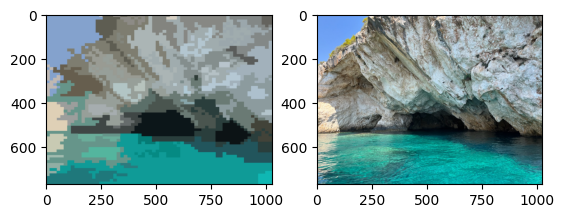

In [4]:
start_time = time.time()

result_image = split_and_merge(input_image)

end_time = time.time()
execution_time = end_time - start_time

save_image(result_image, image_path, split_depth, split_threshold, merge_threshold, execution_time)

f, axarr = plt.subplots(1,2)
axarr[0].imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
axarr[1].imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.show()

## Split & Merge algorithm
The Split & Merge algorithm consists on two different phases:
1) **SPLIT**: we initialize the first region $x_0$ to be the entire area of the image. We calculate its variance $\sigma^2_0$ and, if it is above a certain threshold, we split the image into four subregions. The process is repeated until the variance of all the regions $x_i$ is below the threshold.

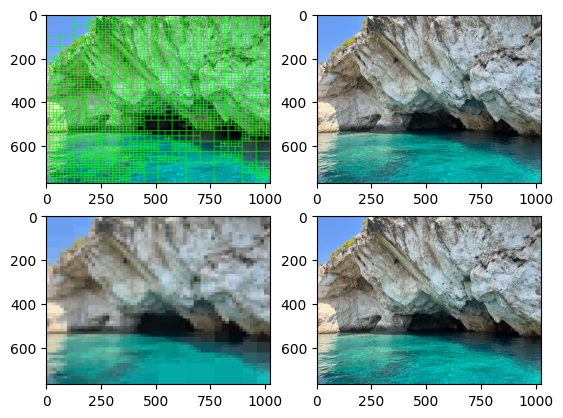

In [5]:
initial_region = Region(0, 0, input_image.shape[1], input_image.shape[0])

homogeneous_regions = split(input_image, initial_region, threshold=250, max_depth=6)

output_with_rectangles = visualize_homogeneous_regions(input_image, homogeneous_regions)

output_with_avg_color = visualize_homogeneous_regions_with_avg_color(input_image, homogeneous_regions)

f, axarr = plt.subplots(2,2)
axarr[0, 0].imshow(cv2.cvtColor(output_with_rectangles, cv2.COLOR_BGR2RGB))
axarr[0, 1].imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
axarr[1, 0].imshow(cv2.cvtColor(output_with_avg_color, cv2.COLOR_BGR2RGB))
axarr[1, 1].imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))

- **MERGE**:

![alt text](content/DS_SignalProject.png "Title")

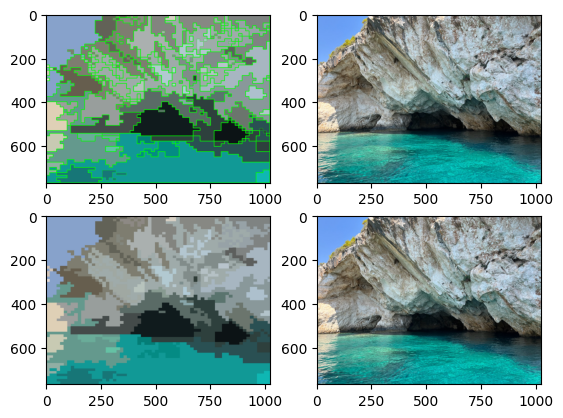

In [ ]:
regions = merge(homogeneous_regions, threshold=8000000)

image_with_borders = visualize_regions_with_borders(input_image, regions)
image_with_mean_color = visualize_regions_with_avg_color(input_image, regions)
f, axarr = plt.subplots(2,2)
axarr[0, 0].imshow(cv2.cvtColor(image_with_borders, cv2.COLOR_BGR2RGB))
axarr[0, 1].imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
axarr[1, 0].imshow(cv2.cvtColor(image_with_mean_color, cv2.COLOR_BGR2RGB))
axarr[1, 1].imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))